### Dataset Selection

**Binary classification**:

1. MAGIC Gamma Telescope:

    shape(19020, 11)
    
    https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope
    
2. MiniBooNE Particle Identification:
    
    (130065, 50)

    https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification
    
3. **Skin Segmentation:**

    (245057, 4)

    https://archive.ics.uci.edu/ml/datasets/skin+segmentation
    
4. Spambase: 

    (4601, 57)
    
    https://archive.ics.uci.edu/ml/datasets/spambase
    
**Multi-class classification**:
1. Steel Plates Faults: 

    (1941, 21)
    
    http://archive.ics.uci.edu/ml/datasets/steel+plates+faults
    
2. Gas Sensor Array Drift:

    (13910, 128)
    
     https://archive.ics.uci.edu/ml/datasets/gas+sensor+array+drift+dataset
    
3. Image Segmentation:

4. Landsat Satellite:

5. Letter Recognition

6. Optical Recognition of Handwritten Digits

7. Page Blocks

8. Shuttle

9. Waveform

10. Yeast


**Regression**: 

1. Abalone 

    (4177,8)
    
    https://archive.ics.uci.edu/ml/datasets/Abalone

2. Communities and Crime 

    (1994,128)
    
    http://archive.ics.uci.edu/ml/datasets/communities+and+crime

3. Concrete Compressive Strength 

    (1030, 9)
    
    https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

4. Wine 

    (178,13)
    
    https://archive.ics.uci.edu/ml/datasets/wine

5. Year Prediction 

    (515345, 90)
    
    https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd

In [1]:
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Skin_NonSkin.txt', sep = '\t', header = None)
df.columns = ['a', 'b', 'c', 'label']

In [3]:
# Label 2 has more sample, it is chosen as the normal data, and label 1 is the abnormal one
df['label'].value_counts()

2    194198
1     50859
Name: label, dtype: int64

In [4]:
df.head(15)

,a,b,c,label
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
5,69,80,118,1
6,70,81,119,1
7,70,81,119,1
8,76,87,125,1
9,76,87,125,1


### Problem dimension control

1. point difficulty

2. relative frequency

3. semantic variation and clusteredness

4. feature irrelevance

In [5]:
# number of dataset
N_normal_total = df['label'].value_counts().values[0]
N_max = int(N_normal_total/0.9)

# normal and abnormal data
label_n = 2
label_an = 1
df_n  = df.loc[df['label'] == label_n]
df_an = df.loc[df['label'] == label_an]

# choose a column to use
# data_n and data_an are both np array
col_index = 1
data_n = df_n.iloc[:,col_index].values
data_an = df_an.iloc[:,col_index].values

# nomalization
def normalize(data):
    normed = (data - data.mean()) / data.std()
    return normed

data_n = normalize(data_n)
data_an = normalize(data_an)

In [6]:
# point difficulty and reference frenquency
def compute_pd_rf(N, N_an):
    N_n = N - N_an
    pd = (2 * N_an * N_n) / (N**2)
    rf = N_an/N
    return pd, rf

def rate_pd_rf(pd, rf):
    if pd < 0.16:
        pd_level = "pd-1"
    elif pd < 0.3:
        pd_level = "pd-2"
    elif pd < 0.5:
        pd_level = "pd-3"
    else: 
        print ("pd is", pd, "pd level too high")
        return
    
    if rf < 0.001:
        rf_level = "rf-1"
    elif rf < 0.005:
        rf_level = "rf-2"
    elif rf < 0.01:
        rf_level = "rf-3"
    elif rf < 0.05:
        rf_level = "rf-4"
    elif rf < 0.1:
        rf_level = "rf-5"
    else:
        print ("rf is", rf, ", rf level too high")
        return 
    return pd_level, rf_level

def get_pd_rf(N, N_an):
    pd, rf = compute_pd_rf(N, N_an)
    print ("pd is", pd, "; rf is", rf)
    pd_level, rf_level = rate_pd_rf(pd, rf)
    print ("pd level is", pd_level, "; rf level is", rf_level)
    return pd, rf, pd_level, rf_level
    
# get_pd_rf(1000, 50)

pd is 0.095 ; rf is 0.05
pd level is pd-1 ; rf level is rf-5


(0.095, 0.05, 'pd-1', 'rf-5')

In [7]:
# normalized clusteredness
def compute_nc(data_n, data_an):
    sign = "-"
    if math.log(np.var(data_n)/np.var(data_an)) > 0:
        sign = "+"
    print ("nc level is", sign)
    return sign

In [8]:
def compute_problem_dimension(d_n, d_an):
    N_n = d_n.shape[0]
    N_an = d_an.shape[0]
    N = N_n + N_an
    print (N_n, N_an, N)
    if N < 100 or N > N_max:
        print("Data amount",data_amount, "incompatible.")
        return
    pd, rf, pd_level, rf_level = get_pd_rf(N, N_an)
    nc_level = compute_nc(d_n, d_an)

In [9]:
def generate_dataset(N, N_an):
    np.random.shuffle(data_n)
    np.random.shuffle(data_an)
    N_n = N-N_an
    d_n = data_n[:N_n]
    d_an = data_an[:N_an]
    label_array = np.array([1]*N_n+[-1]*N_an)
    ds = pd.DataFrame(np.append(d_n, d_an), columns = ['value'])
    ds['lable'] = label_array
    
    compute_problem_dimension(d_n, d_an)
    return d_n, d_an, ds

d_n, d_an, ds = generate_dataset(100000, 700)

99300 700 100000
pd is 0.013902 ; rf is 0.007
pd level is pd-1 ; rf level is rf-3
nc level is +


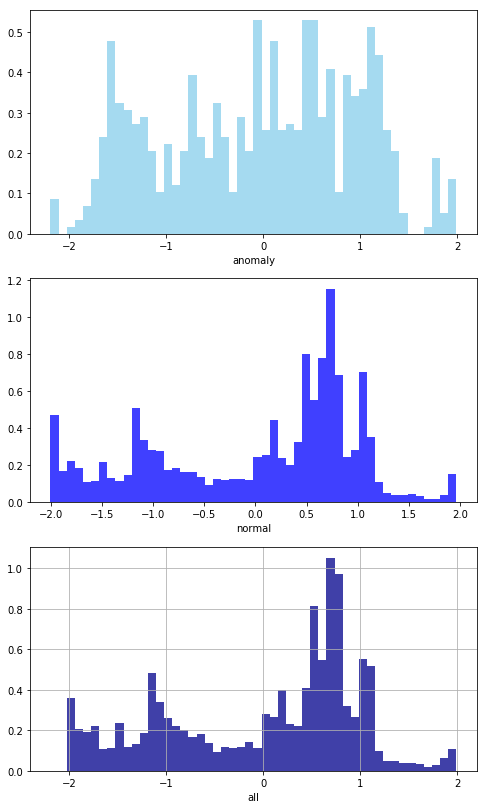

In [10]:
# the histogram of the data
def show_data():
    fig, (ax1, ax2,ax3) = plt.subplots(3, figsize=(8,14))
    N_bins = 50
    n_an, bins_an, patches_an = ax1.hist(d_an, N_bins, normed=1, facecolor='skyblue', alpha=0.75)
    n_n, bins_n, patches_n = ax2.hist(d_n, N_bins, normed=1, facecolor='blue', alpha=0.75)
    n_n, bins, patches_n = ax3.hist(ds['value'], N_bins, normed=1, facecolor='darkblue', alpha=0.75)
    ax1.set_xlabel('anomaly')
    ax2.set_xlabel('normal')
    ax3.set_xlabel('all')
    plt.grid(True)
    plt.show()
    
show_data()

In [11]:
# ds

##### Problem: outlier and anomaly not strongly related

### Outlier method I:
mean and variance

In [12]:
mean_d = np.mean(ds['value'])
print ("mean of the dataset is", mean_d)

def variance(x):
    return abs(x - mean_d)**2

ds['var'] = variance(ds['value'])

var_max = ds['var'].max()
print("max variance is", var_max)
# set threshold
var_threshold = 4.5

# Normal: 1
# Anomaly: -1
# for 0 < var < 4.0, var_score is normalized to 0~1
# for 4.0 < var < max_var, normalize to -1 ~ 0
def norm_var(x):
    if x > var_threshold:
        return (var_max-x)/(var_max-var_threshold)-1
    if x < var_threshold:
        return (var_threshold-x)/(var_threshold)
    return 0

ds['var_norm'] = np.array([norm_var(x) for x in ds['var']])

mean of the dataset is 0.0027144934608899114
max variance is 4.821661824861028


### Outlier method II:
median an distance

In [13]:
median_d = np.median(ds['value'])
print ("median of the dataset is", median_d)

def dist(x):
    return abs(x - median_d)

ds['dist'] = dist(ds['value'])
dist_max = ds['dist'].max()
print ("dist_max is", dist_max)

def norm_dist(x):
    return abs((dist_max-x)/(dist_max))*2-1

ds['dist_norm'] = norm_dist(ds['dist'])
ds.head()

median of the dataset is 0.4073421446921052
dist_max is 2.60045592886611


,value,lable,var,var_norm,dist,dist_norm
0,0.516242,1,0.263710,0.941398,0.108899,0.916246
1,0.236214,1,0.054522,0.987884,0.171128,0.868386
2,0.500685,1,0.247974,0.944895,0.093342,0.928211
3,0.920725,1,0.842744,0.812724,0.513383,0.605159
4,-1.863990,1,3.484586,0.225647,2.271332,-0.746872


### Quantile as Anomaly Detection
sort the value and get do with $\tau$-quantile

In [20]:
ds['quant'] = ds['value'].rank()/ds.shape[0]
ds

,value,lable,var,var_norm,dist,dist_norm,rank,quant
0,0.516242,1,0.263710,0.941398,0.108899,0.916246,55431.5,0.554315
1,0.236214,1,0.054522,0.987884,0.171128,0.868386,46414.5,0.464145
2,0.500685,1,0.247974,0.944895,0.093342,0.928211,54027.0,0.540270
3,0.920725,1,0.842744,0.812724,0.513383,0.605159,84923.0,0.849230
4,-1.863990,1,3.484586,0.225647,2.271332,-0.746872,4663.0,0.046630
5,0.314000,1,0.096898,0.978467,0.093342,0.928211,48000.0,0.480000
6,-0.915009,1,0.842216,0.812841,1.322351,-0.017015,25482.5,0.254825
7,0.516242,1,0.263710,0.941398,0.108899,0.916246,55431.5,0.554315
8,0.889611,1,0.786586,0.825203,0.482269,0.629089,84274.5,0.842745
9,1.107410,1,1.220353,0.728810,0.700068,0.461580,94085.5,0.940855


### Evaluation method: ROC

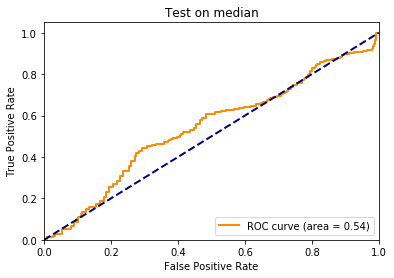

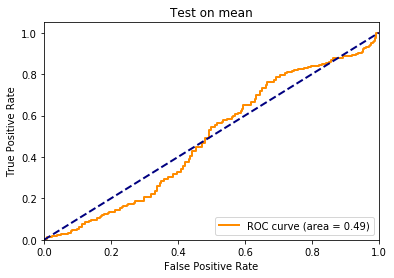

In [15]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

def draw_roc(test= 'mean' ):
    fpr, tpr, _ = roc_curve(ds['lable'], ds['var_norm'])
    if test == 'median':
        fpr, tpr, _ = roc_curve(ds['lable'], ds['dist_norm'])
    roc_auc = auc(fpr, tpr)
    # Compute micro-average ROC curve and ROC area
    #     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    #     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Test on '+test)
    plt.legend(loc="lower right")
    plt.show()
    
draw_roc('median')
draw_roc()